
# Tarea 6. EJERCICIO KNN. "Students Grading Analysis"

In [6]:
import polars as pl

# Asegúrate de que el nombre del archivo sea correcto
df = pl.read_csv("Students_Grading_Dataset.csv")

# Verificamos que se cargó correctamente
print(df.head())


shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ Master's  ┆ Medium    ┆ 1         ┆ 5.9      │
│           ┆           ┆           ┆ universit ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [7]:
print(df.columns)
print(df.dtypes)


['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
[String, String, String, String, String, Int64, String, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, String, Float64, String, String, String, String, Int64, Float64]


El código comienza importando la biblioteca Polars, que es una alternativa moderna y muy rápida a pandas para el manejo de datos en Python. Luego, se carga el archivo CSV llamado "Students_Grading_Dataset_Biased.csv" en un DataFrame llamado df usando la función pl.read_csv(). Esta línea permite tener todos los datos organizados en una estructura tabular para su posterior análisis. A continuación, se imprime df.head() para mostrar las primeras cinco filas del conjunto de datos, lo cual es útil para obtener una vista preliminar de cómo están organizadas las columnas y los valores. Finalmente, al ejecutar df.schema, se obtiene un diccionario que muestra los nombres de todas las columnas junto con sus respectivos tipos de datos (como enteros, texto, flotantes, etc.), lo cual es fundamental para decidir qué tipo de transformaciones o análisis se pueden aplicar después.

In [9]:
from google.colab import files
uploaded = files.upload()


Saving Students_Grading_Dataset_Biased.csv to Students_Grading_Dataset_Biased.csv


In [10]:
import polars as pl

# Asegúrate de que el nombre del archivo sea correcto
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Verificamos que se cargó correctamente
print(df.head())

shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ High      ┆ Medium    ┆ 5         ┆ 4.7      │
│           ┆           ┆           ┆ universit ┆   ┆ School    ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [11]:
print(df.columns)
print(df.dtypes)

['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
[String, String, String, String, String, Int64, String, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, String, Float64, String, String, String, String, Int64, Float64]


In [12]:

df.schema

Schema([('Student_ID', String),
        ('First_Name', String),
        ('Last_Name', String),
        ('Email', String),
        ('Gender', String),
        ('Age', Int64),
        ('Department', String),
        ('Attendance (%)', Float64),
        ('Midterm_Score', Float64),
        ('Final_Score', Float64),
        ('Assignments_Avg', Float64),
        ('Quizzes_Avg', Float64),
        ('Participation_Score', Float64),
        ('Projects_Score', Float64),
        ('Total_Score', Float64),
        ('Grade', String),
        ('Study_Hours_per_Week', Float64),
        ('Extracurricular_Activities', String),
        ('Internet_Access_at_Home', String),
        ('Parent_Education_Level', String),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)', Int64),
        ('Sleep_Hours_per_Night', Float64)])

In [13]:
#En este caso tendré en mente la visualización de los expuestos en clase teniendo:
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])
df2


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
str,i64,str,f64,str
"""F""",5,"""Yes""",6.2,"""Medium"""
"""A""",4,"""Yes""",19.0,"""Medium"""
"""D""",6,"""Yes""",20.7,"""Low"""
"""A""",3,"""Yes""",24.8,"""High"""
"""F""",2,"""Yes""",15.4,"""High"""
…,…,…,…,…
"""D""",10,"""Yes""",25.5,"""Low"""
"""C""",4,"""Yes""",5.0,"""Medium"""
"""A""",4,"""No""",24.8,"""Medium"""


En la parte anterior crea un nuevo DataFrame llamado df2 que selecciona únicamente un subconjunto de columnas relevantes del conjunto original. En este caso, se escogen las variables relacionadas con el rendimiento académico y su contexto:

'Grade' (nota final),

'Stress_Level (1-10)' (nivel de estrés),
'Internet_Access_at_Home' (acceso a internet en casa),
'Study_Hours_per_Week' (horas de estudio por semana) y
 'Family_Income_Level' (nivel de ingresos familiares).

  Esta selección tiene como objetivo facilitar un análisis más enfocado en los factores sociales y personales que podrían estar influyendo en las calificaciones de los estudiantes, lo cual es coherente con el enfoque explorado en clase.



In [14]:
'''Visualizando la columna "Family_Income_Level" observo que existen varias etiquetas de "Medium" por lo que
procederé por medio un conteo a obsrevar cuál es la frecuencia de e ste componente.'''

# 1. Calcula la frecuencia absoluta (conteo de cada valor)
frecuencia_absoluta = df2['Family_Income_Level'].value_counts()

print(frecuencia_absoluta)

shape: (3, 2)
┌─────────────────────┬───────┐
│ Family_Income_Level ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ Medium              ┆ 1973  │
│ Low                 ┆ 1983  │
│ High                ┆ 1044  │
└─────────────────────┴───────┘


El objetivo es analizar la columna "Family_Income_Level" (nivel de ingresos familiares), específicamente porque "Low" que aparece varias veces la etiqueta al igual que  "Medium" y sequiere confirmar si realmente es la más frecuente. Para ello, se calcula la frecuencia absoluta, es decir, cuántas veces aparece cada categoría (como "Low", "Medium", "High", etc.) en esa columna.

El método value_counts() cuenta cuántas veces aparece cada valor distinto en la columna 'Family_Income_Level', y print(frecuencia_absoluta) muestra ese resultado en pantalla. Esto permite saber, por ejemplo, si la mayoría de los estudiantes provienen de familias con ingresos medios, bajos o altos.



Se observa que dentro de la variable "Nivel de Ingreso Familiar", la categoría "Low" presenta la mayor frecuencia con un total de 1983 registros, lo que indica que una proporción significativa de los estudiantes proviene de hogares con bajos ingresos. Le sigue la categoría "Medium" con 1973 casos, y en menor proporción, la categoría "High", con 1044 registros. Esta distribución se puede visualizar claramente en la siguiente gráfica, la cual permite identificar tendencias socioeconómicas predominantes en la población estudiada.

In [17]:
import plotly.express as px

# Convertimos el resultado de Polars a pandas
frecuencia_plot = frecuencia_absoluta.to_pandas()

# Cambiamos el nombre de la columna automáticamente si es necesario
frecuencia_plot.columns = ['Nivel_Ingresos', 'Frecuencia']

# Gráfica de barras interactiva
fig = px.bar(
    frecuencia_plot,
    x='Nivel_Ingresos',
    y='Frecuencia',
    title='Frecuencia de Nivel de Ingresos Familiares',
    labels={'Frecuencia': 'Cantidad de Estudiantes', 'Nivel_Ingresos': 'Nivel de Ingresos'},
    color='Nivel_Ingresos'
)
fig.show()


Ahora procederé con el análisis detallado de los niveles de recursos familiares, desglosando la variable "Nivel de Ingreso Familiar" para obtener una comprensión más profunda de la distribución de estos recursos entre los estudiantes. Este desglose se llevará a cabo conforme a los parámetros discutidos en clase, lo que permitirá un análisis más completo de las características socioeconómicas de los estudiantes y su posible influencia en su rendimiento académico.

In [18]:
import polars as pl

# 1. Cargar el archivo CSV original
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# 2. Seleccionar columnas relevantes para el análisis social-académico
df2 = df.select([
    'Grade',
    'Stress_Level (1-10)',
    'Internet_Access_at_Home',
    'Study_Hours_per_Week',
    'Family_Income_Level'
])

# 3. Renombrar columnas a español para mayor claridad
df2 = df2.rename({
    'Grade': 'Nota_Final',
    'Stress_Level (1-10)': 'Nivel_Estres',
    'Internet_Access_at_Home': 'Internet_en_Casa',
    'Study_Hours_per_Week': 'Horas_Estudio_Semana',
    'Family_Income_Level': 'Nivel_Ingresos'
})

# 4. Define los niveles de ingresos en orden
income_levels = ["Low", "Medium", "High"]

# 5. Crear las columnas de One-Hot Encoding para los niveles de ingresos
df3 = df2.with_columns([
    (df2["Nivel_Ingresos"].is_in(income_levels[i:])).cast(pl.Int8).alias(f"Ingreso_{level}")
    for i, level in enumerate(income_levels)
])

# 6. Opcional: Eliminar la columna original 'Nivel_Ingresos' si ya no es necesaria
# df3 = df3.drop("Nivel_Ingresos")

# 7. Visualizar las primeras filas del DataFrame transformado
print(df3.head())

# 8. Mostrar la estructura del DataFrame (tipos de columnas)
print(df3.schema)


shape: (5, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Nota_Final ┆ Nivel_Estr ┆ Internet_e ┆ Horas_Est ┆ Nivel_Ing ┆ Ingreso_L ┆ Ingreso_M ┆ Ingreso_H │
│ ---        ┆ es         ┆ n_Casa     ┆ udio_Sema ┆ resos     ┆ ow        ┆ edium     ┆ igh       │
│ str        ┆ ---        ┆ ---        ┆ na        ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆ i64        ┆ str        ┆ ---       ┆ str       ┆ i8        ┆ i8        ┆ i8        │
│            ┆            ┆            ┆ f64       ┆           ┆           ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ F          ┆ 5          ┆ Yes        ┆ 6.2       ┆ Medium    ┆ 1         ┆ 1         ┆ 0         │
│ A          ┆ 4          ┆ Yes        ┆ 19.0      ┆ Medium    ┆ 1         ┆ 1         ┆ 0         │
│ D          ┆ 6          ┆ Yes        ┆ 20.7      ┆ Low       ┆ 1         ┆ 

EL CODIGO DEFINE :

Define los niveles de ingresos en orden: "Low", "Medium", y "High".

Genera una nueva columna para cada nivel de ingreso utilizando la función is_in, que verifica si el valor de la columna "Family_Income_Level" pertenece a uno de los niveles especificados (de manera acumulativa). Por ejemplo:

Para "Low", la columna será 1 si el valor es "Low" o si es "Medium" o "High", pero como es acumulativa, se genera una columna distinta para cada nivel de ingreso.

Se usa cast(pl.Int8) para convertir el resultado en valores binarios (0 o 1), como es habitual en One-Hot Encoding.

El alias cambia los nombres de las nuevas columnas a algo más descriptivo, como Income_Low, Income_Medium, e Income_High.

Se imprime el resultado de df3.head() para visualizar las primeras filas del DataFrame transformado y df3.schema para verificar el tipo de datos de cada columna.

In [20]:
print(df3.head())
df3.schema

shape: (5, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Nota_Final ┆ Nivel_Estr ┆ Internet_e ┆ Horas_Est ┆ Nivel_Ing ┆ Ingreso_L ┆ Ingreso_M ┆ Ingreso_H │
│ ---        ┆ es         ┆ n_Casa     ┆ udio_Sema ┆ resos     ┆ ow        ┆ edium     ┆ igh       │
│ str        ┆ ---        ┆ ---        ┆ na        ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆ i64        ┆ str        ┆ ---       ┆ str       ┆ i8        ┆ i8        ┆ i8        │
│            ┆            ┆            ┆ f64       ┆           ┆           ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ F          ┆ 5          ┆ Yes        ┆ 6.2       ┆ Medium    ┆ 1         ┆ 1         ┆ 0         │
│ A          ┆ 4          ┆ Yes        ┆ 19.0      ┆ Medium    ┆ 1         ┆ 1         ┆ 0         │
│ D          ┆ 6          ┆ Yes        ┆ 20.7      ┆ Low       ┆ 1         ┆ 

Schema([('Nota_Final', String),
        ('Nivel_Estres', Int64),
        ('Internet_en_Casa', String),
        ('Horas_Estudio_Semana', Float64),
        ('Nivel_Ingresos', String),
        ('Ingreso_Low', Int8),
        ('Ingreso_Medium', Int8),
        ('Ingreso_High', Int8)])

In [25]:
import polars as pl

# Cargar datos
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Selección de columnas clave
df2 = df.select([
    pl.col("Grade").alias("Nota_Final"),
    pl.col("Stress_Level (1-10)").alias("Nivel_Estres"),
    pl.col("Internet_Access_at_Home").alias("Internet_en_Casa"),
    pl.col("Study_Hours_per_Week").alias("Horas_Estudio_Semana"),
    pl.col("Family_Income_Level").alias("Nivel_Ingresos")
])

# Codificación One-Hot acumulativa
niveles = ["Low", "Medium", "High"]
df3 = df2.with_columns([
    (df2["Nivel_Ingresos"].is_in(niveles[i:])).cast(pl.Int8).alias(f"Income_{nivel}")
    for i, nivel in enumerate(niveles)
])

# Verificamos las columnas necesarias
print(df3.select(["Nivel_Ingresos", "Income_Low", "Income_Medium", "Income_High"]).head())



shape: (5, 4)
┌────────────────┬────────────┬───────────────┬─────────────┐
│ Nivel_Ingresos ┆ Income_Low ┆ Income_Medium ┆ Income_High │
│ ---            ┆ ---        ┆ ---           ┆ ---         │
│ str            ┆ i8         ┆ i8            ┆ i8          │
╞════════════════╪════════════╪═══════════════╪═════════════╡
│ Medium         ┆ 1          ┆ 1             ┆ 0           │
│ Medium         ┆ 1          ┆ 1             ┆ 0           │
│ Low            ┆ 1          ┆ 0             ┆ 0           │
│ High           ┆ 1          ┆ 1             ┆ 1           │
│ High           ┆ 1          ┆ 1             ┆ 1           │
└────────────────┴────────────┴───────────────┴─────────────┘


En este apartado, utilizaré la función hstack() para realizar un apilamiento horizontal, lo cual permite concatenar las columnas del DataFrame original df3 con las nuevas columnas generadas mediante variables dummy correspondientes a la variable Grade. El resultado se almacena en df4, que contiene tanto las columnas originales de df3 como las columnas adicionales codificadas de manera binaria según los niveles de calificación

In [29]:
df3.group_by("Nivel_Ingresos").agg([
    pl.col("Nota_Final").mean().alias("Promedio_Nota"),
    pl.col("Nivel_Estres").mean().alias("Promedio_Estres"),
    pl.col("Horas_Estudio_Semana").mean().alias("Promedio_Horas_Estudio")
])


Nivel_Ingresos,Promedio_Nota,Promedio_Estres,Promedio_Horas_Estudio
str,str,f64,f64
"""Low""",null,5.422088,17.691528
"""Medium""",null,5.549417,17.410492
"""High""",null,5.462644,18.066188


Podemos ver, por ejemplo, cómo se relaciona el ingreso con la nota final o el nivel de estrés, usando agrupaciones o promedios por nivel de ingreso.

Esto nos permite decir cosas como: "los estudiantes con ingresos bajos tienen, en promedio, un mayor nivel de estrés y menor nota final."

In [30]:
import pandas as pd
import plotly.express as px

# Convertimos el dataframe de Polars a pandas
df_pandas = df3.to_pandas()

# Agrupar por nivel de ingreso y nivel de estrés
stack_data = df_pandas.groupby(['Nivel_Ingresos', 'Nivel_Estres']).size().reset_index(name='Cantidad')

# Crear gráfica de barras apiladas
fig = px.bar(
    stack_data,
    x="Nivel_Ingresos",
    y="Cantidad",
    color="Nivel_Estres",
    title="Estudiantes por Nivel de Ingreso y Nivel de Estrés",
    labels={"Cantidad": "Cantidad de Estudiantes", "Nivel_Ingresos": "Nivel de Ingreso"}
)
fig.show()


Este bloque de código:

Convierte el DataFrame de Polars a pandas para facilitar el uso de plotly.express.

Agrupa los datos por dos variables categóricas: Nivel de Ingreso y Nivel de Estrés.

Cuenta cuántos estudiantes hay en cada combinación de esas dos categorías.

Crea una gráfica de barras apiladas, donde:

El eje X muestra los niveles de ingreso (Low, Medium, High),

El eje Y muestra la cantidad de estudiantes,

Los colores representan los distintos niveles de estrés.

¿Para qué sirve?

Permite visualizar cómo se distribuye el nivel de estrés dentro de cada grupo de ingreso familiar. Esto ayuda a identificar si, por ejemplo, los estudiantes con menos ingresos tienden a tener más estrés.



<ipython-input-31-b686651ffd00>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




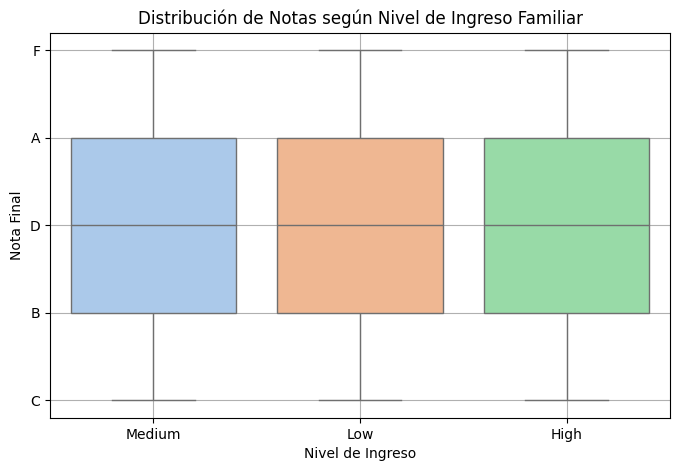

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_pandas, x="Nivel_Ingresos", y="Nota_Final", palette="pastel")
plt.title("Distribución de Notas según Nivel de Ingreso Familiar")
plt.xlabel("Nivel de Ingreso")
plt.ylabel("Nota Final")
plt.grid(True)
plt.show()


¿Qué hace el código?

Utiliza la librería seaborn para generar un diagrama de caja (boxplot).

Agrupa los datos según el nivel de ingreso y muestra la distribución de la variable Nota Final para cada grupo.

Los boxplots permiten ver:

La mediana (línea dentro de la caja),

El rango intercuartílico (la caja),

Los valores atípicos (puntos fuera de los bigotes).

¿Para qué sirve?

Sirve para comparar cómo varían las notas de los estudiantes dependiendo de su nivel de ingreso. Puedes observar si hay diferencias marcadas entre los grupos y si algunos presentan mayor variabilidad o desempeño académico.

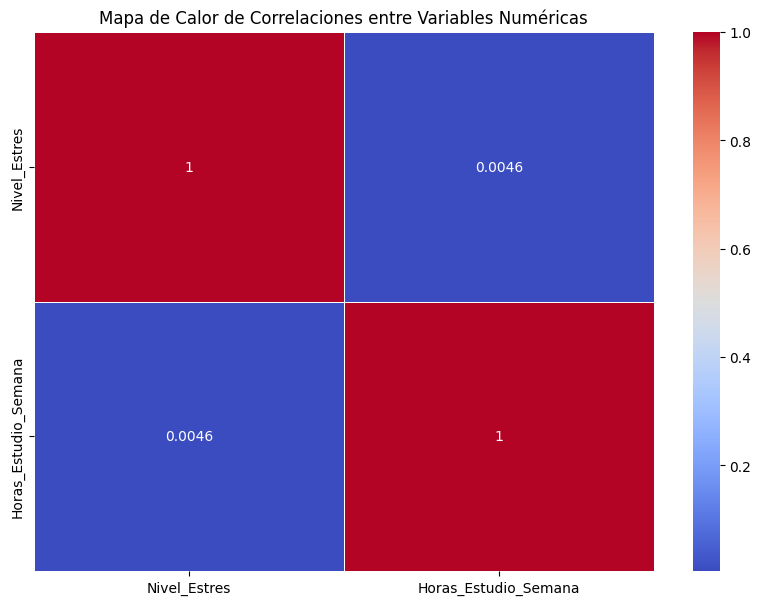

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas para correlación
numericas = df_pandas.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Crear heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()


¿Qué hace el código?

Filtra solo las columnas numéricas del DataFrame.

Calcula la matriz de correlación, que muestra qué tan relacionada está cada variable con las demás (valores entre -1 y 1).

Crea un mapa de calor (heatmap) usando seaborn, donde:

Los colores indican el grado de correlación (rojo fuerte = correlación alta, azul = baja),

Las anotaciones muestran el valor numérico exacto.

¿Para qué sirve?

Permite detectar relaciones entre variables numéricas. Por ejemplo, si la nota final está fuertemente correlacionada con las horas de estudio o el nivel de estrés, esto se verá reflejado claramente en el heatmap.

# *Primer Punto:* ¿Cómo puedes evaluar la hipótesis de que el problema de que casi todas las predicciones den Medium se debe a la desproporción de datos en esa columna?

In [45]:
import polars as pl

# Asegúrate de que el nombre del archivo sea correcto
df = pl.read_csv("Students_Grading_Dataset.csv")

# Verificamos que se cargó correctamente
print(df.head())

shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ Master's  ┆ Medium    ┆ 1         ┆ 5.9      │
│           ┆           ┆           ┆ universit ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [46]:
import polars as pl

# Asegúrate de que el nombre del archivo sea correcto
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Verificamos que se cargó correctamente
print(df.head())

shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ High      ┆ Medium    ┆ 5         ┆ 4.7      │
│           ┆           ┆           ┆ universit ┆   ┆ School    ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [47]:
#En este caso tendré en mente la visualización de los expuestos en clase teniendo:
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])
df2


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
str,i64,str,f64,str
"""F""",5,"""Yes""",6.2,"""Medium"""
"""A""",4,"""Yes""",19.0,"""Medium"""
"""D""",6,"""Yes""",20.7,"""Low"""
"""A""",3,"""Yes""",24.8,"""High"""
"""F""",2,"""Yes""",15.4,"""High"""
…,…,…,…,…
"""D""",10,"""Yes""",25.5,"""Low"""
"""C""",4,"""Yes""",5.0,"""Medium"""
"""A""",4,"""No""",24.8,"""Medium"""


In [48]:
# Supongamos que 'Grade' es la etiqueta (variable objetivo)
y_true = df2['Grade'].to_numpy()  # Etiquetas reales

# Suponiendo que ya tienes las predicciones de tu modelo
# Aquí te mostraré cómo usar un modelo simple de clasificación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dividir el conjunto de datos en entrenamiento y prueba
X = df2.drop('Grade', axis=1)  # Variables independientes
y = df2['Grade']  # Variable dependiente (etiquetas)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo (en este caso RandomForest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar las predicciones
y_pred = model.predict(X_test)


TypeError: DataFrame.drop() got an unexpected keyword argument 'axis'

In [49]:
# En lugar de df2.drop('Grade', axis=1), debes usar:
X = df2.drop('Grade')  # Variables independientes
y = df2['Grade']  # Variable dependiente (etiquetas)


In [52]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame de Polars
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Seleccionar las columnas necesarias
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])

# Convertirlo a pandas para trabajar con scikit-learn
df_pandas = df2.to_pandas()

# Codificar las variables categóricas
label_encoder = LabelEncoder()

# Asegúrate de que las columnas categóricas estén presentes en el DataFrame
df_pandas['Internet_Access_at_Home'] = label_encoder.fit_transform(df_pandas['Internet_Access_at_Home'])
df_pandas['Family_Income_Level'] = label_encoder.fit_transform(df_pandas['Family_Income_Level'])
df_pandas['Grade'] = label_encoder.fit_transform(df_pandas['Grade'])

# Dividir el conjunto de datos en entrenamiento y prueba
X = df_pandas.drop('Grade', axis=1)  # Variables independientes
y = df_pandas['Grade']  # Variable dependiente (etiquetas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer las predicciones
y_pred = model.predict(X_test)

# Generar la


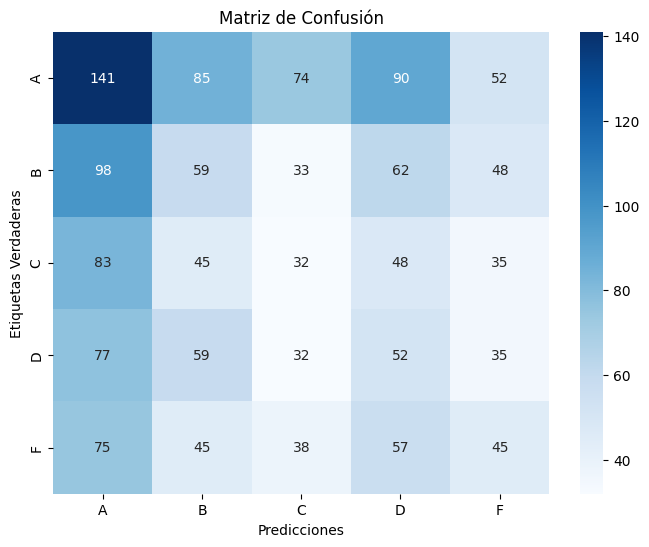

In [54]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame de Polars
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Seleccionar las columnas necesarias
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])

# Convertirlo a pandas para trabajar con scikit-learn
df_pandas = df2.to_pandas()

# Codificar las variables categóricas
label_encoder = LabelEncoder()

# Codificamos las columnas categóricas
df_pandas['Internet_Access_at_Home'] = label_encoder.fit_transform(df_pandas['Internet_Access_at_Home'])
df_pandas['Family_Income_Level'] = label_encoder.fit_transform(df_pandas['Family_Income_Level'])
df_pandas['Grade'] = label_encoder.fit_transform(df_pandas['Grade'])

# Dividir el conjunto de datos en entrenamiento y prueba
X = df_pandas.drop('Grade', axis=1)  # Variables independientes
y = df_pandas['Grade']  # Variable dependiente (etiquetas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer las predicciones
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")

# Mostrar la visualización
plt.show()


# Matriz de confusión:

 Es una herramienta que muestra cuántas veces el modelo predijo correctamente y cuántas veces cometió errores en las diferentes categorías de "Grade". La matriz tiene:

Filas: las clases reales (etiquetas verdaderas).

Columnas:

las clases predichas por el modelo.

Usamos Seaborn para visualizar la matriz de confusión como un mapa de calor. Los valores en la matriz muestran el número de veces que una predicción fue correcta o incorrecta para cada clase.

Título y etiquetas:

Añadimos un título y etiquetas para hacer la visualización más comprensible.

¿Para qué sirve todo esto?

Este código te permite:

Entrenar un modelo para predecir la nota de los estudiantes en función de varias características (estrés, horas de estudio, acceso a internet, ingresos familiares).

Evaluar el rendimiento del modelo mediante la matriz de confusión, lo que te ayuda a ver cómo de bien está prediciendo el modelo las categorías de notas (A, B, C, etc.).

Visualizar los resultados de manera clara utilizando gráficos como la matriz de confusión.

Es útil para entender cómo los factores de un estudiante afectan su rendimiento académico y mejorar las predicciones de acuerdo a esos factores.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Convertir a pandas para compatibilidad con sklearn
df_pandas = df2.to_pandas()

# Codificar variables categóricas
df_encoded = pd.get_dummies(df_pandas, columns=["Grade", "Internet_Access_at_Home"])

# Separar features y target
X = df_encoded.drop("Family_Income_Level", axis=1)
y = df_encoded["Family_Income_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Matriz de confusión
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Métricas por clase
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Matriz de Confusión:
 [[ 78 154  91]
 [130 269 194]
 [132 258 194]]

Reporte de Clasificación:
               precision    recall  f1-score   support

        High       0.23      0.24      0.24       323
         Low       0.40      0.45      0.42       593
      Medium       0.41      0.33      0.37       584

    accuracy                           0.36      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.36      0.36      0.36      1500



# Interpretación

Filas: Representan las clases reales o etiquetas verdaderas.

Columnas: Corresponden a las clases que el modelo ha predicho.

Diagonal Principal (78, 269, 194): Indica las predicciones correctas, es decir, los verdaderos positivos.

Fuera de la Diagonal: Reflejan los errores cometidos por el modelo.


# Desglose por Clase

# Clase "High" (Real):

78 muestras fueron correctamente clasificadas como "High".

154 muestras fueron incorrectamente clasificadas como "Low".

91 muestras fueron erróneamente clasificadas como "Medium".

# Clase "Low" (Real):

269 muestras fueron correctamente clasificadas como "Low".

130 muestras fueron incorrectamente clasificadas como "High".

194 muestras fueron erróneamente clasificadas como "Medium".

# Clase "Medium" (Real):

194 muestras fueron correctamente clasificadas como "Medium".

132 muestras fueron erróneamente clasificadas como "High".

258 muestras fueron incorrectamente clasificadas como "Low"

# Métricas por clase

Precisión

Con este ítem busco resolver la siguiente pregunta: De todas las muestras predichas como clase X, ¿cuántas eran realmente de esa clase?

Predicciones correctas de Medium: 194.

Predicciones totales como Medium: 194 (correctas) + 194 (errores de Low) + 132 (errores de Medium) = 520.

Precisión = 194 / 520 ≈ 0.37.


# Segundo Punto:Predecir la variable numérica Horas_de_estudio_por_semana_normalizadas, determinar el error para cada k y elegir la mejor k.

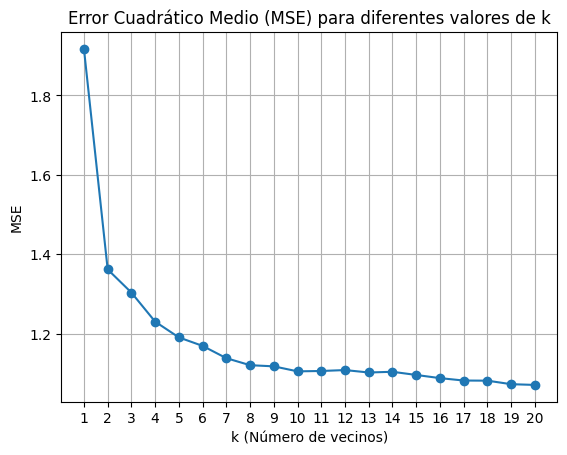

El mejor valor de k es: 20


In [57]:
import polars as pl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos (asegúrate de tener el archivo correcto)
df = pl.read_csv("Students_Grading_Dataset_Biased.csv")

# Convertir Polars DataFrame a Pandas DataFrame para trabajar con sklearn
df_pandas = df.to_pandas()

# Selección de columnas relevantes
df2 = df_pandas[['Study_Hours_per_Week', 'Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Family_Income_Level']]

# One-Hot Encoding de las variables categóricas
df2 = pd.get_dummies(df2, columns=['Grade', 'Internet_Access_at_Home', 'Family_Income_Level'])

# Normalización de la variable objetivo 'Study_Hours_per_Week'
scaler = StandardScaler()
df2['Study_Hours_per_Week_normalized'] = scaler.fit_transform(df2[['Study_Hours_per_Week']])

# Dividir el dataset en variables independientes y dependientes
X = df2.drop(columns=['Study_Hours_per_Week', 'Study_Hours_per_Week_normalized'])
y = df2['Study_Hours_per_Week_normalized']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listar los valores de k a probar
k_values = range(1, 21)
errors = []

# Probar diferentes valores de k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Graficar el MSE para cada k
plt.plot(k_values, errors, marker='o')
plt.title('Error Cuadrático Medio (MSE) para diferentes valores de k')
plt.xlabel('k (Número de vecinos)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mejor k (el que minimiza el MSE)
best_k = k_values[errors.index(min(errors))]
print(f"El mejor valor de k es: {best_k}")



El código implementa un proceso de regresión utilizando el algoritmo de K-Vecinos más Cercanos (KNN) para predecir las horas de estudio por semana. A lo largo del proceso:

Se cargan los datos y se preparan.

Se codifican las variables categóricas usando One-Hot Encoding.

Se normaliza la variable objetivo para mejorar el rendimiento del modelo.

Se entrena el modelo con diferentes valores de k (número de vecinos) y se evalúa el rendimiento utilizando el Error Cuadrático Medio (MSE).

Se selecciona el valor de k que minimiza el MSE y se muestra en una gráfica

In [61]:
print(df3.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High']


In [62]:
# Asegúrate de que la columna "Grade" existe antes de intentar usarla
if 'Grade' in df3.columns:
    df4 = df3.hstack(df3.select("Grade").to_dummies())
    print(df4.schema)
else:
    print("La columna 'Grade' no está presente en el DataFrame.")


La columna 'Grade' no está presente en el DataFrame.


In [63]:
df4 = df3.hstack(df3.select("Nota_Final").to_dummies())


In [64]:
print(df4.schema)


Schema([('Nota_Final', String), ('Nivel_Estres', Int64), ('Internet_en_Casa', String), ('Horas_Estudio_Semana', Float64), ('Nivel_Ingresos', String), ('Income_Low', Int8), ('Income_Medium', Int8), ('Income_High', Int8), ('Nota_Final_A', UInt8), ('Nota_Final_B', UInt8), ('Nota_Final_C', UInt8), ('Nota_Final_D', UInt8), ('Nota_Final_F', UInt8)])


In [65]:
print(df4.head())


shape: (5, 13)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Nota_Fina ┆ Nivel_Est ┆ Internet_ ┆ Horas_Est ┆ … ┆ Nota_Fina ┆ Nota_Fina ┆ Nota_Fina ┆ Nota_Fin │
│ l         ┆ res       ┆ en_Casa   ┆ udio_Sema ┆   ┆ l_B       ┆ l_C       ┆ l_D       ┆ al_F     │
│ ---       ┆ ---       ┆ ---       ┆ na        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ i64       ┆ str       ┆ ---       ┆   ┆ u8        ┆ u8        ┆ u8        ┆ u8       │
│           ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ F         ┆ 5         ┆ Yes       ┆ 6.2       ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 1        │
│ A         ┆ 4         ┆ Yes       ┆ 19.0      ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
│ D         ┆ 6         ┆ Yes       ┆ 20.7      ┆ … ┆ 0         ┆ 0         

In [67]:
print(df3.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High']


In [69]:
print(df3.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High']


In [70]:
df4 = df3.hstack(df3.select("Nota_Final").to_dummies())
print(df4.schema)


Schema([('Nota_Final', String), ('Nivel_Estres', Int64), ('Internet_en_Casa', String), ('Horas_Estudio_Semana', Float64), ('Nivel_Ingresos', String), ('Income_Low', Int8), ('Income_Medium', Int8), ('Income_High', Int8), ('Nota_Final_A', UInt8), ('Nota_Final_B', UInt8), ('Nota_Final_C', UInt8), ('Nota_Final_D', UInt8), ('Nota_Final_F', UInt8)])


In [73]:
# Verifica las columnas de df3
print(df3.columns)

# Si df4 es una transformación de df3, revisemos también las columnas de df4
print(df4.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High']
['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High', 'Nota_Final_A', 'Nota_Final_B', 'Nota_Final_C', 'Nota_Final_D', 'Nota_Final_F']


In [74]:

df4.select(['Nota_Final','Nota_Final_A', 'Nota_Final_B', 'Nota_Final_C', 'Nota_Final_D', 'Nota_Final_F'])

Nota_Final,Nota_Final_A,Nota_Final_B,Nota_Final_C,Nota_Final_D,Nota_Final_F
str,u8,u8,u8,u8,u8
"""F""",0,0,0,0,1
"""A""",1,0,0,0,0
"""D""",0,0,0,1,0
"""A""",1,0,0,0,0
"""F""",0,0,0,0,1
…,…,…,…,…,…
"""D""",0,0,0,1,0
"""C""",0,0,1,0,0
"""A""",1,0,0,0,0


In [76]:
# Verifica las columnas de df4
print(df4.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High', 'Nota_Final_A', 'Nota_Final_B', 'Nota_Final_C', 'Nota_Final_D', 'Nota_Final_F']


In [84]:
print(df4.columns)


['Nota_Final', 'Nivel_Estres', 'Internet_en_Casa', 'Horas_Estudio_Semana', 'Nivel_Ingresos', 'Income_Low', 'Income_Medium', 'Income_High', 'Nota_Final_A', 'Nota_Final_B', 'Nota_Final_C', 'Nota_Final_D', 'Nota_Final_F']


In [88]:
print(df4.schema)


Schema([('Nota_Final', String), ('Nivel_Estres', Int64), ('Internet_en_Casa', Int8), ('Horas_Estudio_Semana', Float64), ('Nivel_Ingresos', String), ('Income_Low', Int8), ('Income_Medium', Int8), ('Income_High', Int8), ('Nota_Final_A', UInt8), ('Nota_Final_B', UInt8), ('Nota_Final_C', UInt8), ('Nota_Final_D', UInt8), ('Nota_Final_F', UInt8)])


In [91]:
df4.select("Internet_en_Casa").unique()


Internet_en_Casa
i8
1
0


# Tercer Punto:


 *Añadir nuevas variables que puedan mejorar el rendimiento.
Algunas variables nuevas que pueden mejorar que hacen parte del dataset original y pueden ayudar a mejorar el rendimiento actual son:*


Attendance (%): La justificación sería que posiblemente estudiantes con mayor asistencia podrían tener hábitos de estudio más consistentes.

Midterm_Score y Final_Score: La justificación sería que las calificaciones altas podrían correlacionarse con más horas de estudio.

Sleep_Hours_per_Night: La justificación sería que menos horas de sueño podrían indicar más horas de estudio (o viceversa).

Projects_Score y Quizzes_Avg: La justificación sería que las actividades académicas específicas podrían requerir más tiempo de estudio.

Total_Score: La justificación sería que la puntuación global académica como proxy de dedicación.

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cargar datos
df = pd.read_csv("/content/Students_Grading_Dataset_Biased.csv")

# Crear nuevas variables (ejemplo)
df["Stress_Sleep_Interaction"] = df["Stress_Level (1-10)"] * df["Sleep_Hours_per_Night"]
df["Score_Improvement"] = df["Final_Score"] - df["Midterm_Score"]


# Definir columnas
numerical_cols = ["Stress_Level (1-10)", "Sleep_Hours_per_Night", "Attendance (%)", "Midterm_Score", "Final_Score"]
categorical_cols = ["Grade", "Internet_Access_at_Home", "Family_Income_Level"]

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ])

X = preprocessor.fit_transform(df)
y = df["Study_Hours_per_Week"]


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Instead of using fillna on the NumPy array, use SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con nuevas variables
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))





MSE: 60.740129800000005
